In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
## Feature engineering 
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier) 
df.job_simp.value_counts()

na                286
data scientist    279
analyst           119
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [8]:
#Fix state los angeles

df['job_state'] = df.job_state.apply(lambda x:x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
AZ      9
MO      9
AL      8
KY      6
GA      6
DE      6
MI      6
CT      5
IA      5
NE      4
LA      4
OR      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [9]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.desc_len

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [10]:
# competitor count
df['num_comp'] = df.Competitors.apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [11]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [12]:
df.Competitors

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [14]:
#hourly wage to annual 
df['min_salary'] = df.apply(lambda x : x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x : x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis = 1)

In [17]:
#

Data Scientist                                    131
Data Engineer                                      53
Senior Data Scientist                              34
Data Analyst                                       15
Senior Data Engineer                               14
                                                 ... 
Sr. Data Scientist, Cyber-Security LT Contract      1
Data Scientist (Warehouse Automation)               1
System and Data Analyst                             1
Data Scientist - Research                           1
Senior Data Scientist - Algorithms                  1
Name: Job Title, Length: 264, dtype: int64

In [18]:
#Remove new lines from company text
df.company_txt

0                          Tecolote Research\r\n
1      University of Maryland Medical System\r\n
2                                    KnowBe4\r\n
3                                       PNNL\r\n
4                         Affinity Solutions\r\n
                         ...                    
737                                      GSK\r\n
738                               Eventbrite\r\n
739           Software Engineering Institute\r\n
740                             Numeric, LLC\r\n
741             Riverside Research Institute\r\n
Name: company_txt, Length: 742, dtype: object

In [22]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', '').replace('\r', ''))

In [23]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [24]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

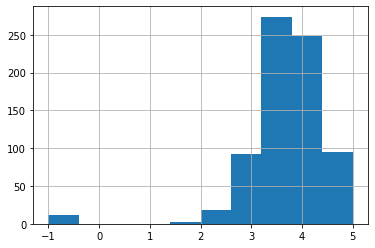

In [26]:
df.Rating.hist()

<AxesSubplot:>

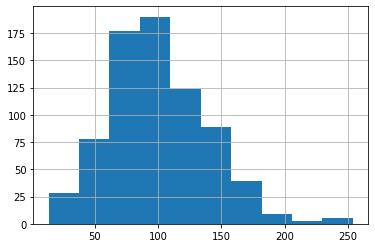

In [27]:
df.avg_salary.hist()

<AxesSubplot:>

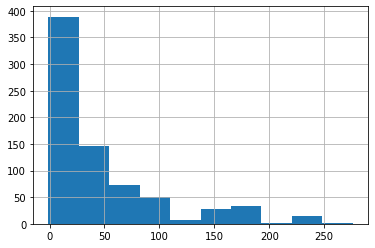

In [28]:
df.age.hist()

<AxesSubplot:>

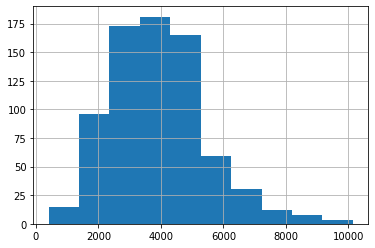

In [29]:
df.desc_len.hist()

<AxesSubplot:>

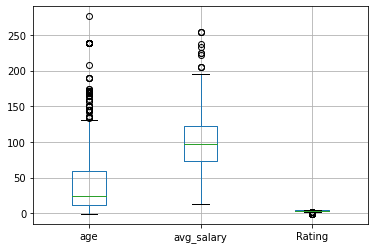

In [32]:
#outlier
df.boxplot(column=['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

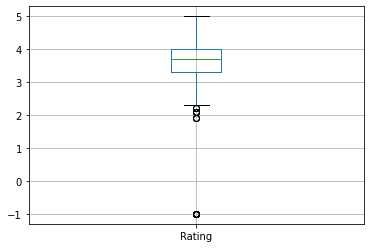

In [34]:
#outlier
df.boxplot(column= ['Rating'])

In [35]:
#co-relation
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
desc_len,0.165090,0.078093,-0.012631,1.000000


<AxesSubplot:>

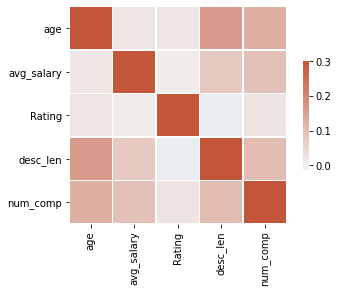

In [41]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'num_comp']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [43]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state' ,'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority' ]]

graph for Location: total = 200


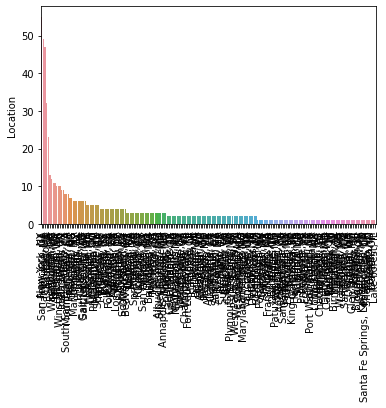

graph for Headquarters: total = 198


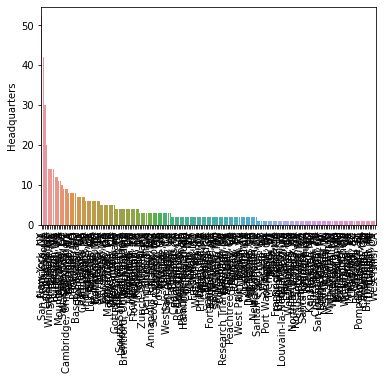

graph for Size: total = 9


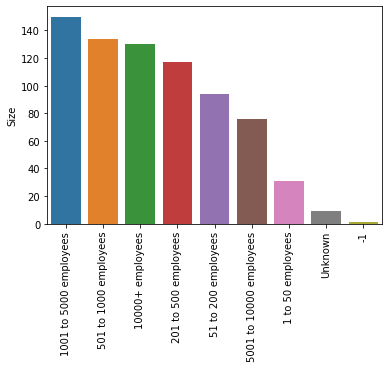

graph for Founded: total = 102


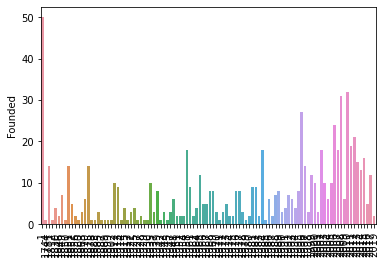

graph for Type of ownership: total = 11


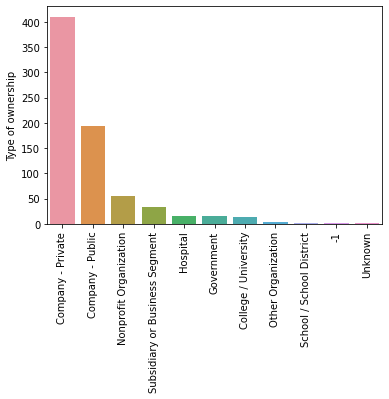

graph for Industry: total = 60


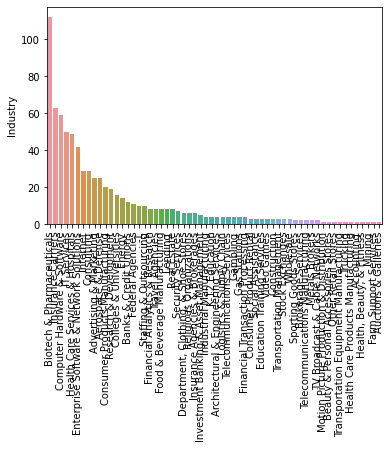

graph for Sector: total = 25


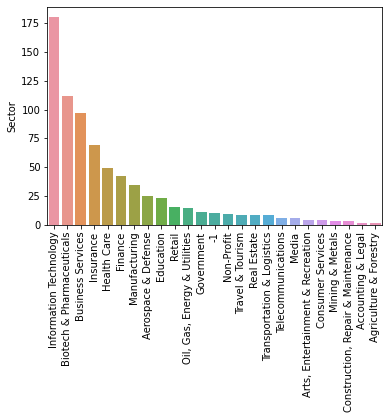

graph for Revenue: total = 14


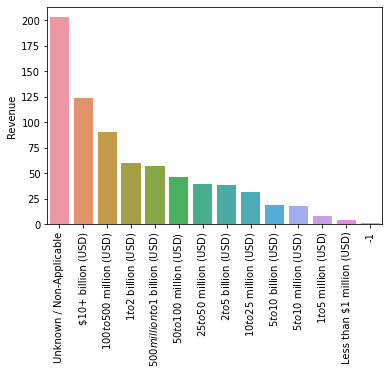

graph for company_txt: total = 343


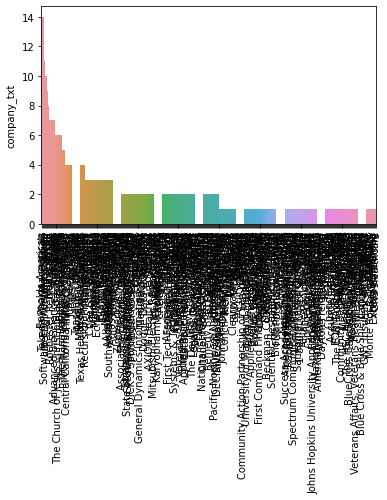

graph for job_state: total = 37


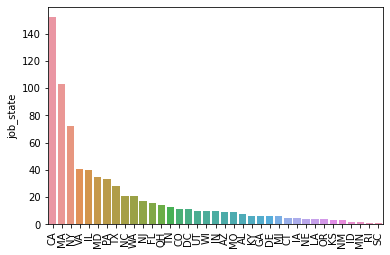

graph for same_state: total = 2


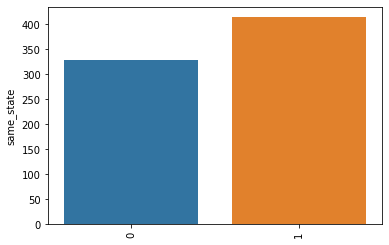

graph for python_yn: total = 2


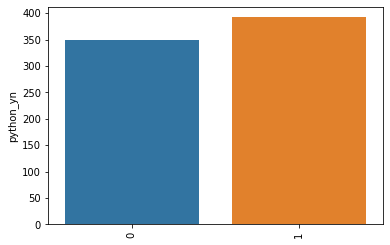

graph for R_yn: total = 2


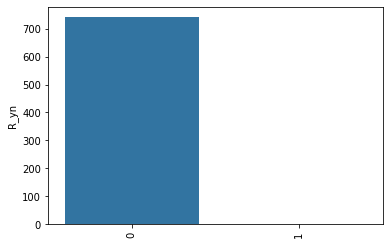

graph for spark: total = 2


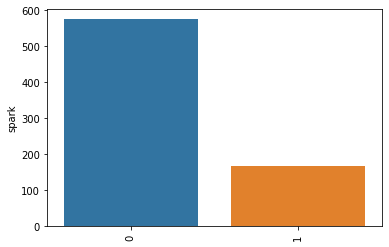

graph for aws: total = 2


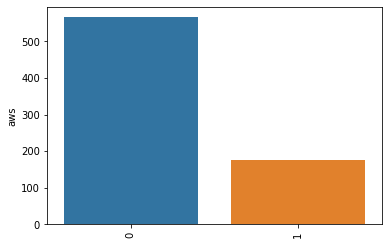

graph for excel: total = 2


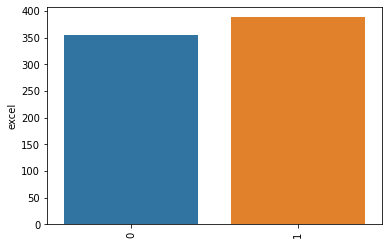

graph for job_simp: total = 6


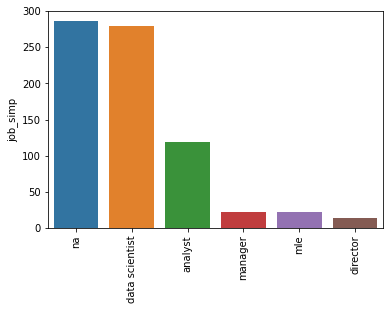

graph for seniority: total = 3


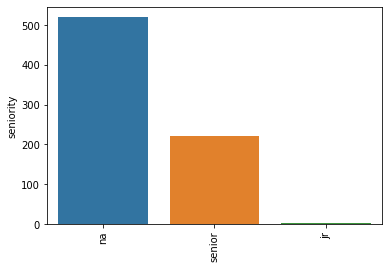

In [53]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num,data=df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


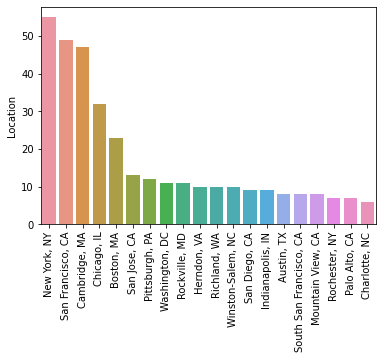

graph for Headquarters: total = 20


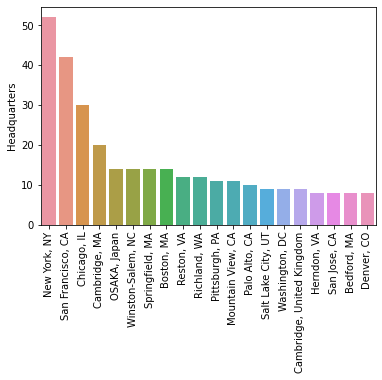

graph for company_txt: total = 20


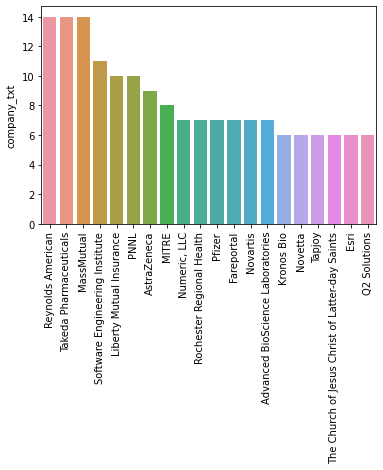

In [55]:
#Again seeing the real long ones

for i in df[['Location', 'Headquarters', 'company_txt']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num,data=df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [56]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [58]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')
## what actually the pivot table is doing is df[df['job_simp'] == 'analyst']['avg_salary'].mean() to every index.

,avg_salary
job_simp,
analyst,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,78.078671


In [61]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             jr          56.500000
               na          69.263682
               senior      99.428571

In [63]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values(by = 'avg_salary' , ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [71]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary',aggfunc='count').sort_values(by = 'job_state' , ascending=False)

avg_salary
job_state job_simp                  
WI        na                       7
          data scientist           3
WA        na                       4
          data scientist          17
VA        na                      11
          mle                      2
          data scientist          18
          analyst                 10
UT        analyst                  3
          data scientist           3
          na                       4
TX        na                       7
          data scientist          13
          analyst                  8
TN        na                       2
          data scientist           1
          analyst                 10
SC        na                       1
RI        na                       1
PA        manager                  3
          data scientist           6
          analyst                  1
          mle                      7
          na                      16
OR        data scientist           3
          analyst                  1
OH        na                       7
          data scientist           7
NY        na                      26
          mle                      2
          data scientist          40
          analyst                  4
NM        data scientist           3
NJ        director                 2
          analyst                  2
          data scientist           4
          manager                  2
          na                       7
NE        na                       4
NC        na                      12
          data scientist           3
          analyst                  6
MO        na                       5
          manager                  1
          data scientist           3
MN        na                       1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      19
          data scientist          13
          analyst                  3
MA        na                      50
          manager                  5
          director                 6
          data scientist          30
          analyst                 12
LA        analyst                  2
          na                       2
KY        data scientist           2
          na                       4
KS        mle                      3
IN        na                       4
          data scientist           2
          analyst                  4
IL        analyst                  8
          na                       9
          mle                      2
          director                 6
          data scientist          15
ID        na                       2
IA        analyst                  3
          na                       2
GA        na                       3
          data scientist           3
FL        na                       6
          data scientist           7
          analyst                  3
DE        na                       6
DC        na                       2
          data scientist           5
          analyst                  4
CT        data scientist           2
          na                       3
CO        na                       4
          mle                      1
          data scientist           3
          analyst                  3
CA        na                      45
          mle                      5
          manager                  9
          data scientist          68
          analyst                 25
AZ        na                       3
          analyst                  5
          data scientist           1
AL        na                       7
          analyst                  1

In [74]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = ['job_state'], values = 'avg_salary').sort_values(by = 'avg_salary' , ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [75]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [76]:
#rating , industry , sector , revenue , number of comp , hourly , employer provided , python , r, spark , aws , excel , desc_len , type of ownership

In [80]:
df_pivots = df[['Rating' , 'Industry' , 'Sector' , 'Revenue' , 'num_comp' , 'hourly' , 'employer_provided' , 'python_yn' , 'R_yn', 'spark' , 'aws' , 'excel' , 'desc_len' , 'Type of ownership', 'avg_salary']]

In [81]:
df_pivots.columns

Index(['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly',
       'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'desc_len', 'Type of ownership', 'avg_salary'],
      dtype='object')

In [88]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(i)
        print(pd.pivot_table(df_pivots , index = i , values = 'avg_salary').sort_values('avg_salary', ascending= False))
        print('################')
        print('\n' * 10)

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
################











Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommuni

In [94]:
pd.pivot_table(df_pivots , index = 'Revenue' , columns= 'python_yn',values = 'avg_salary',aggfunc='count' )

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
